# Equations of an oscillating DCA cascade

Consider the circle forming the arc of the suction or pressure surface $Q$, where $Q = S\ \mathrm{or}\ P$ respectively of blade $n$, where $ n = 0, \pm 1$. It has a radius of $R_{Qn}$ and its center is at $(x_{Qn}, y_{Qn})$, as per the the global coordinate system $(x, y)$. Also, consider another "local" coordinate system centered at $(x_{Ln}, y_{Ln})$, using which the surfaces $P$ and $S$ of blade $n$ may be defined; this coordinate system is common for pressure and suction surfaces (hence does not carry index $Q$) and coincides with the midpoint of the blade's camberline. The coordinates for global system are $(x, y)$ and those for local system are $(x', y')$. The equation of the circle in this local coordinate system is given by:
$$
[x' - (x_{Qn} - x_{Ln})]^2 + [y' - (y_{Qn} - y_{Ln})]^2 = R_{Qn}^2
$$

In parametric form, the abscissa and ordinate are, with $\theta = 0$ to $2\pi$:
$$
x' = (x_{Qn} - x_{Ln}) + R_{Qn}\cos\theta \\
y' = (y_{Qn} - y_{Ln}) + R_{Qn}\sin\theta
$$

Now, suppose, the circle is rotated about $(x_{Tn}, y_{Tn})$ counter-clockwise by an amount $\alpha_n = A\sin(\omega t + n\sigma)$. We first seek its equation in the local and then the global cooordinate systems.

Suppose a point $E = (x', y')$ is rotated by $\alpha_n$ about another point whose (local) coordinate is $(x_{Tn} - x_{Ln}, y_{Tn} - y_{Ln})$ is moved to a new location F. The coordinates of $F = (x'', y'')$ in the _local_ coordinate system is given by:
$$
x'' = [x' + (x_{Ln} - x_{Tn})]\cos(\alpha_n) - [y' + (y_{Ln} - y_{Tn})]\sin(\alpha_n) - (x_{Ln} - x_{Tn}) \\
y'' = [x' + (x_{Ln} - x_{Tn})]\sin(\alpha_n) + [y' + (y_{Ln} - y_{Tn})]\cos(\alpha_n) - (y_{Ln} - y_{Tn})
$$

In the global coordinate system, they are given by:
$$
x = [x' + (x_{Ln} - x_{Tn})]\cos(\alpha_n) - [y' + (y_{Ln} - y_{Tn})]\sin(\alpha_n) - (x_{Ln} - x_{Tn}) + x_{Ln} \\
y = [x' + (x_{Ln} - x_{Tn})]\sin(\alpha_n) + [y' + (y_{Ln} - y_{Tn})]\cos(\alpha_n) - (y_{Ln} - y_{Tn}) + y_{Ln}
$$

Simplifying,
$$
x = [(x_{Qn} - x_{Ln}) + R_{Qn}\cos\theta + (x_{Ln} - x_{Tn})]\cos(\alpha_n) - [(y_{Qn} - y_{Ln}) + R_{Qn}\sin\theta + (y_{Ln} - y_{Tn})]\sin(\alpha_n) + x_{Tn} \\
y = [(x_{Qn} - x_{Ln}) + R_{Qn}\cos\theta + (x_{Ln} - x_{Tn})]\sin(\alpha_n) + [(y_{Qn} - y_{Ln}) + R_{Qn}\sin\theta + (y_{Ln} - y_{Tn})]\cos(\alpha_n) + y_{Tn}
$$

Simplifying further,
$$
x = [x_{Qn} + R_{Qn}\cos\theta - x_{Tn}]\cos(\alpha_n) - [y_{Qn} + R_{Qn}\sin\theta - y_{Tn}]\sin(\alpha_n) + x_{Tn} \\
y = [x_{Qn} + R_{Qn}\cos\theta - x_{Tn}]\sin(\alpha_n) + [y_{Qn} + R_{Qn}\sin\theta - y_{Tn}]\cos(\alpha_n) + y_{Tn}
$$


![alt text](schem_mod1.jpg "Figure 1")

In [16]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
import sympy as sp
sp.init_printing()
import datetime
x, y, θ, α_n, α_0, α_p1, α_m1, x_Tn, y_Tn, x_Ln, y_Ln, x_Qn, y_Qn, R_Qn = sp.symbols('x, y, θ, α_n, α_0, α_{p1}, α_{m1}, x_{Tn}, y_{Tn}, x_{Ln}, y_{Ln}, x_{Qn}, y_{Qn}, R_{Qn}')
tStart = datetime.datetime.now()


In [17]:
Stag_deg = 30
s_c = 0.5
Uref = 35
Freq = 2
Amp = 2
Code = 'BEQ'
FilePref = (Code + "_S_%02d_sc_%03.2f_U%02d_F%02d_A%02d_") % (Stag_deg, s_c, Uref, Freq, Amp)
A1, A2, A3 = 1, 1, 1

CycNums = 3
StepsPerCyc = 200
StepsPerChord = 100
Stag = Stag_deg*math.pi/180
ibpa_all = np.linspace(0,360,14,endpoint=False)
ibpa_all[0] = 1
ibpa_all = [180]    ########################@@@@@@@@@@@@@@@    for diagnostics
print(FilePref)
delX = s_c*np.sin(Stag)
delY = s_c*np.cos(Stag)
print('Red freq = ' + str(2*math.pi*Freq*1/Uref))

BEQ_S_30_sc_0.50_U35_F02_A02_
Red freq = 0.35903916041026207


Now, we create the appropriate Python symbolic expressions:

In [18]:
x = ((x_Qn - x_Ln) + R_Qn*sp.cos(θ) + (x_Ln - x_Tn))*sp.cos(α_n) - ((y_Qn - y_Ln) + R_Qn*sp.sin(θ) + (y_Ln - y_Tn))*sp.sin(α_n) + x_Tn
y = ((x_Qn - x_Ln) + R_Qn*sp.cos(θ) + (x_Ln - x_Tn))*sp.sin(α_n) + ((y_Qn - y_Ln) + R_Qn*sp.sin(θ) + (y_Ln - y_Tn))*sp.cos(α_n) + y_Tn


xS, yS = 0.0, -2.30232582401
xP, yP = 0.0, -8.36178245685
RS, RP = 2.32982692659, 8.33466051773

xdTL, ydTL = 0, 0   # x and y distance between T and L (for pure torsion (0,0); for pure bending (-infinity,0);)

x_Lm1,y_Lm1,x_Sm1,y_Sm1,R_Sm1,x_Pm1,y_Pm1,R_Pm1=  delX,  delY, xS + delX, yS + delY, RS, xP + delX, yP+ delY, RP
x_L0, y_L0, x_S0, y_S0, R_S0, x_P0, y_P0, R_P0 =  0.0 ,   0.0, xS, yS, RS, xP, yP, RP
x_Lp1,y_Lp1,x_Sp1,y_Sp1,R_Sp1,x_Pp1,y_Pp1,R_Pp1= -delX, -delY, xS - delX, yS - delY, RS, xP - delX, yP - delY, RP

x_Tm1, y_Tm1= x_Lm1+ xdTL , y_Lm1+ ydTL
x_T0 , y_T0 = x_L0 + xdTL , y_L0 + ydTL
x_Tp1, y_Tp1= x_Lp1+ xdTL , y_Lp1+ ydTL

θvec = np.linspace(0, np.pi, 100)
x, y

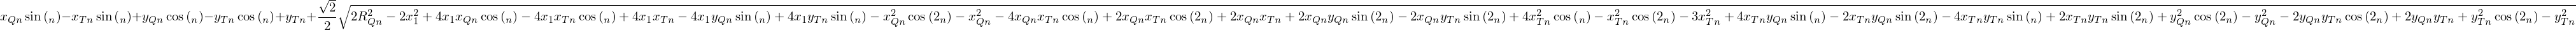

In [21]:
# get an equation in terms of x and y (eliminate θ)
S_θ, C_θ, x_1, y_1 = sp.symbols('S_θ, C_θ, x_1, y_1')
eq1 = sp.Eq(-R_Qn*sp.sin(α_n)*S_θ + R_Qn*sp.cos(α_n)*C_θ , x_1 - x_Tn - (x_Qn - x_Tn)*sp.cos(α_n) + (y_Qn - y_Tn)*sp.sin(α_n))
eq2 = sp.Eq(+R_Qn*sp.cos(α_n)*S_θ + R_Qn*sp.sin(α_n)*C_θ , y_1 - y_Tn - (y_Qn - y_Tn)*sp.cos(α_n) - (x_Qn - x_Tn)*sp.sin(α_n))
(eq1, eq2)
sols = sp.solve([eq1, eq2], [C_θ, S_θ])
eq3 = sp.Eq(sols[C_θ]**2 + sols[S_θ]**2, 1)
g2 = sp.solve(eq3, y_1)
g2[1]    # the root in the upper hemisphere of circle


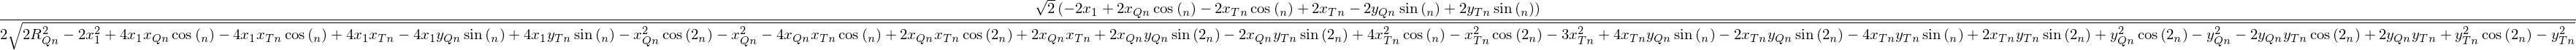

In [22]:
sp.diff(g2[1],x_1)

In [7]:
class Curve:
    def __init__(self, x_Ln, y_Ln, x_Tn, y_Tn, x_Qn, y_Qn, R_Qn):
        self.x_Ln = x_Ln
        self.y_Ln = y_Ln
        self.x_Tn = x_Tn
        self.y_Tn = y_Tn
        self.x_Qn = x_Qn
        self.y_Qn = y_Qn
        self.R_Qn = R_Qn
    
    def xy(self, α_n):
        self.α_n = α_n
        self.x = np.linspace(-0.5 + self.x_Ln, 0.5 + self.x_Ln, StepsPerChord)
        self.y = self.x_Qn*np.sin(self.α_n) - self.x_Tn*np.sin(self.α_n) + self.y_Qn*np.cos(self.α_n) - self.y_Tn*np.cos(self.α_n) + self.y_Tn + np.sqrt(2)*np.sqrt(2*self.R_Qn**2 - 2*self.x**2 + 4*self.x*self.x_Qn*np.cos(α_n) - 4*self.x*self.x_Tn*np.cos(self.α_n) + 4*self.x*self.x_Tn - 4*self.x*self.y_Qn*np.sin(self.α_n) + 4*self.x*self.y_Tn*np.sin(self.α_n) - self.x_Qn**2*np.cos(2*self.α_n) - self.x_Qn**2 - 4*self.x_Qn*self.x_Tn*np.cos(self.α_n) + 2*self.x_Qn*self.x_Tn*np.cos(2*self.α_n) + 2*self.x_Qn*self.x_Tn + 2*self.x_Qn*self.y_Qn*np.sin(2*self.α_n) - 2*self.x_Qn*self.y_Tn*np.sin(2*self.α_n) + 4*self.x_Tn**2*np.cos(self.α_n) - self.x_Tn**2*np.cos(2*self.α_n) - 3*self.x_Tn**2 + 4*self.x_Tn*self.y_Qn*np.sin(self.α_n) - 2*self.x_Tn*self.y_Qn*np.sin(2*self.α_n) - 4*self.x_Tn*self.y_Tn*np.sin(self.α_n) + 2*self.x_Tn*self.y_Tn*np.sin(2*self.α_n) + self.y_Qn**2*np.cos(2*self.α_n) - self.y_Qn**2 - 2*self.y_Qn*self.y_Tn*np.cos(2*self.α_n) + 2*self.y_Qn*self.y_Tn + self.y_Tn**2*np.cos(2*self.α_n) - self.y_Tn**2)/2
        self.dydx = np.sqrt(2)*(-2*self.x + 2*self.x_Qn*np.cos(self.α_n) - 2*self.x_Tn*np.cos(self.α_n) + 2*self.x_Tn - 2*self.y_Qn*np.sin(self.α_n) + 2*self.y_Tn*np.sin(self.α_n))/(2*np.sqrt(2*self.R_Qn**2 - 2*self.x**2 + 4*self.x*self.x_Qn*np.cos(α_n) - 4*self.x*self.x_Tn*np.cos(self.α_n) + 4*self.x*self.x_Tn - 4*self.x*self.y_Qn*np.sin(self.α_n) + 4*self.x*self.y_Tn*np.sin(self.α_n) - self.x_Qn**2*np.cos(2*self.α_n) - self.x_Qn**2 - 4*self.x_Qn*self.x_Tn*np.cos(self.α_n) + 2*self.x_Qn*self.x_Tn*np.cos(2*self.α_n) + 2*self.x_Qn*self.x_Tn + 2*self.x_Qn*self.y_Qn*np.sin(2*self.α_n) - 2*self.x_Qn*self.y_Tn*np.sin(2*self.α_n) + 4*self.x_Tn**2*np.cos(self.α_n) - self.x_Tn**2*np.cos(2*self.α_n) - 3*self.x_Tn**2 + 4*self.x_Tn*self.y_Qn*np.sin(self.α_n) - 2*self.x_Tn*self.y_Qn*np.sin(2*self.α_n) - 4*self.x_Tn*self.y_Tn*np.sin(self.α_n) + 2*self.x_Tn*self.y_Tn*np.sin(2*self.α_n) + self.y_Qn**2*np.cos(2*self.α_n) - self.y_Qn**2 - 2*self.y_Qn*self.y_Tn*np.cos(2*self.α_n) + 2*self.y_Qn*self.y_Tn + self.y_Tn**2*np.cos(2*self.α_n) - self.y_Tn**2)) # to push scroll bar

    def yForx(self, α_n, xVec):
        self.α_n = α_n
        self.x = xVec
        self.y4x = self.x_Qn*np.sin(self.α_n) - self.x_Tn*np.sin(self.α_n) + self.y_Qn*np.cos(self.α_n) - self.y_Tn*np.cos(self.α_n) + self.y_Tn + np.sqrt(2)*np.sqrt(2*self.R_Qn**2 - 2*self.x**2 + 4*self.x*self.x_Qn*np.cos(α_n) - 4*self.x*self.x_Tn*np.cos(self.α_n) + 4*self.x*self.x_Tn - 4*self.x*self.y_Qn*np.sin(self.α_n) + 4*self.x*self.y_Tn*np.sin(self.α_n) - self.x_Qn**2*np.cos(2*self.α_n) - self.x_Qn**2 - 4*self.x_Qn*self.x_Tn*np.cos(self.α_n) + 2*self.x_Qn*self.x_Tn*np.cos(2*self.α_n) + 2*self.x_Qn*self.x_Tn + 2*self.x_Qn*self.y_Qn*np.sin(2*self.α_n) - 2*self.x_Qn*self.y_Tn*np.sin(2*self.α_n) + 4*self.x_Tn**2*np.cos(self.α_n) - self.x_Tn**2*np.cos(2*self.α_n) - 3*self.x_Tn**2 + 4*self.x_Tn*self.y_Qn*np.sin(self.α_n) - 2*self.x_Tn*self.y_Qn*np.sin(2*self.α_n) - 4*self.x_Tn*self.y_Tn*np.sin(self.α_n) + 2*self.x_Tn*self.y_Tn*np.sin(2*self.α_n) + self.y_Qn**2*np.cos(2*self.α_n) - self.y_Qn**2 - 2*self.y_Qn*self.y_Tn*np.cos(2*self.α_n) + 2*self.y_Qn*self.y_Tn + self.y_Tn**2*np.cos(2*self.α_n) - self.y_Tn**2)/2

    def y5to5(self, α_n):
        self.α_n = α_n
        self.x = np.linspace(-0.5, 0.5, StepsPerChord)
        self.y = self.x_Qn*np.sin(self.α_n) - self.x_Tn*np.sin(self.α_n) + self.y_Qn*np.cos(self.α_n) - self.y_Tn*np.cos(self.α_n) + self.y_Tn + np.sqrt(2)*np.sqrt(2*self.R_Qn**2 - 2*self.x**2 + 4*self.x*self.x_Qn*np.cos(α_n) - 4*self.x*self.x_Tn*np.cos(self.α_n) + 4*self.x*self.x_Tn - 4*self.x*self.y_Qn*np.sin(self.α_n) + 4*self.x*self.y_Tn*np.sin(self.α_n) - self.x_Qn**2*np.cos(2*self.α_n) - self.x_Qn**2 - 4*self.x_Qn*self.x_Tn*np.cos(self.α_n) + 2*self.x_Qn*self.x_Tn*np.cos(2*self.α_n) + 2*self.x_Qn*self.x_Tn + 2*self.x_Qn*self.y_Qn*np.sin(2*self.α_n) - 2*self.x_Qn*self.y_Tn*np.sin(2*self.α_n) + 4*self.x_Tn**2*np.cos(self.α_n) - self.x_Tn**2*np.cos(2*self.α_n) - 3*self.x_Tn**2 + 4*self.x_Tn*self.y_Qn*np.sin(self.α_n) - 2*self.x_Tn*self.y_Qn*np.sin(2*self.α_n) - 4*self.x_Tn*self.y_Tn*np.sin(self.α_n) + 2*self.x_Tn*self.y_Tn*np.sin(2*self.α_n) + self.y_Qn**2*np.cos(2*self.α_n) - self.y_Qn**2 - 2*self.y_Qn*self.y_Tn*np.cos(2*self.α_n) + 2*self.y_Qn*self.y_Tn + self.y_Tn**2*np.cos(2*self.α_n) - self.y_Tn**2)/2


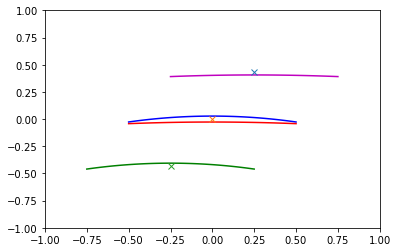

In [12]:
ang_temp = 0*np.pi/180
C1 = Curve(x_Lm1, y_Lm1, x_Tm1, y_Tm1, x_Pm1, y_Pm1, R_Pm1)
C1.xy(ang_temp)

C2 = Curve(x_L0, y_L0, x_T0, y_T0, x_S0, y_S0, R_S0)
C2.xy(ang_temp)

C3 = Curve(x_L0, y_L0, x_T0, y_T0, x_P0, y_P0, R_P0)
C3.xy(ang_temp)

C4 = Curve(x_Lp1, y_Lp1, x_Tp1, y_Tp1, x_Sp1, y_Sp1, R_Sp1)
C4.xy(ang_temp)


plt.figure()
plt.plot(C1.x, C1.y, '-m')
#plt.plot(C1.x, C1.dydx, '--m')
plt.plot(C2.x, C2.y, '-b')
plt.plot(C3.x, C3.y, '-r')
plt.plot(C4.x, C4.y, '-g')
plt.plot(x_Lm1, y_Lm1, 'x')
plt.plot(x_L0,  y_L0,  'x')
plt.plot(x_Lp1, y_Lp1, 'x')
plt.axis((-1, 1 , -1, 1))

The constants for the six arcs are evaluated for the following geometrical parameters: unit chord, 0.5 pitch-to-chord ratio and 30&deg; stagger. The values are listed below:

In [15]:
# A, ω, t, kk = sp.symbols('A, ω, t, kk')


t = np.linspace(0,CycNums/Freq,StepsPerCyc*CycNums)
A,ω = -Amp*math.pi/180, Freq*math.pi*Freq     # Negative Amp to flip the direction of reference for angle.


for ibpa in ibpa_all:
    ibpaRad = ibpa*math.pi/180
    sIBPA = "%05.1f" % ibpa
    αm1 = A1*A*np.sin(ω*t + ibpaRad)
    α0  = A2*A*np.sin(ω*t)
    αp1 = A3*A*np.sin(ω*t - ibpaRad)
    
    # C1 ordinates
    with open(FilePref + "y_C1_" + sIBPA + ".txt", "wb") as myfileYC1:
        np.savetxt(myfileYC1, ['Time\talpha_0\talpha_m1\talpha_p1' + '\tx'*StepsPerChord], fmt="%s")
        np.savetxt(myfileYC1, np.concatenate([[ibpa]*4,C1.x]), fmt="%+15.9e", delimiter='\t', newline=' ')
        myfileYC1.write(b'\n')
        for i in np.arange(np.size(α0)):
            C1 = Curve(x_Lm1, y_Lm1, x_Tm1, y_Tm1, x_Pm1, y_Pm1, R_Pm1)
            C1.xy(αm1[i])
            myfileYC1.write(b'\n')
            np.savetxt(myfileYC1, np.concatenate([[t[i],α0[i],αm1[i],αp1[i]],C1.y]), fmt="%+11.9e", delimiter='\t', newline=' ')

    # C2 ordinates
    with open(FilePref + "y_C2_" + sIBPA + ".txt", "wb") as myfileYC2:
        np.savetxt(myfileYC2, ['Time\talpha_0\talpha_m1\talpha_p1' + '\tx'*StepsPerChord], fmt="%s")
        np.savetxt(myfileYC2, np.concatenate([[ibpa]*4,C2.x]), fmt="%+15.9e", delimiter='\t', newline=' ')
        myfileYC2.write(b'\n')
        for i in np.arange(np.size(α0)):
            C2 = Curve(x_L0, y_L0, x_T0, y_T0, x_S0, y_S0, R_S0)
            C2.xy(α0[i])
            myfileYC2.write(b'\n')
            np.savetxt(myfileYC2, np.concatenate([[t[i],α0[i],αm1[i],αp1[i]],C2.y]), fmt="%+11.9e", delimiter='\t', newline=' ')

    # C3 ordinates
    with open(FilePref + "y_C3_" + sIBPA + ".txt", "wb") as myfileYC3:
        np.savetxt(myfileYC3, ['Time\talpha_0\talpha_m1\talpha_p1' + '\tx'*StepsPerChord], fmt="%s")
        np.savetxt(myfileYC3, np.concatenate([[ibpa]*4,C3.x]), fmt="%+15.9e", delimiter='\t', newline=' ')
        myfileYC3.write(b'\n')
        for i in np.arange(np.size(α0)):
            C3 = Curve(x_L0, y_L0, x_T0, y_T0, x_P0, y_P0, R_P0)
            C3.xy(α0[i])
            myfileYC3.write(b'\n')
            np.savetxt(myfileYC3, np.concatenate([[t[i],α0[i],αm1[i],αp1[i]],C3.y]), fmt="%+11.9e", delimiter='\t', newline=' ')

    # C4 ordinates
    with open(FilePref + "y_C4_" + sIBPA + ".txt", "wb") as myfileYC4:
        np.savetxt(myfileYC4, ['Time\talpha_0\talpha_m1\talpha_p1' + '\tx'*StepsPerChord], fmt="%s")
        np.savetxt(myfileYC4, np.concatenate([[ibpa]*4,C4.x]), fmt="%+15.9e", delimiter='\t', newline=' ')
        myfileYC4.write(b'\n')
        for i in np.arange(np.size(α0)):
            C4 = Curve(x_Lp1, y_Lp1, x_Tp1, y_Tp1, x_Sp1, y_Sp1, R_Sp1)
            C4.xy(αp1[i])
            myfileYC4.write(b'\n')
            np.savetxt(myfileYC4, np.concatenate([[t[i],α0[i],αm1[i],αp1[i]],C4.y]), fmt="%+11.9e", delimiter='\t', newline=' ')
            
    #         
    with open(FilePref + "dydxS_" + sIBPA + ".txt", "wb") as myfileDYS:
        np.savetxt(myfileDYS, ['Time\talpha_0\talpha_m1\talpha_p1' + '\tx'*StepsPerChord], fmt="%s")
        np.savetxt(myfileDYS, np.concatenate([[ibpa]*4,C2.x]), fmt="%+15.9e", delimiter='\t', newline=' ')
        myfileDYS.write(b'\n')
        for i in np.arange(np.size(α0)):
            C2 = Curve(x_L0, y_L0, x_T0, y_T0, x_S0, y_S0, R_S0)
            C2.xy(α0[i])
            myfileDYS.write(b'\n')
            np.savetxt(myfileDYS, np.concatenate([[t[i],α0[i],αm1[i],αp1[i]],C2.dydx]), fmt="%+11.9e", delimiter='\t', newline=' ')

    with open(FilePref + "dydxP_" + sIBPA + ".txt", "wb") as myfileDYP:
        np.savetxt(myfileDYP, ['Time\talpha_0\talpha_m1\talpha_p1' + '\tx'*StepsPerChord], fmt="%s")
        np.savetxt(myfileDYP, np.concatenate([[ibpa]*4,C3.x]), fmt="%+15.9e", delimiter='\t', newline=' ')
        myfileDYP.write(b'\n')
        for i in np.arange(np.size(α0)):
            C3 = Curve(x_L0, y_L0, x_T0, y_T0, x_P0, y_P0, R_P0)
            C3.xy(α0[i])
            myfileDYP.write(b'\n')
            np.savetxt(myfileDYP, np.concatenate([[t[i],α0[i],αm1[i],αp1[i]],C3.dydx]), fmt="%+11.9e", delimiter='\t', newline=' ')

    with open(FilePref + "gap_S_" + sIBPA + ".txt", "wb") as myfileGS:
        np.savetxt(myfileGS, ['Time\talpha_0\talpha_m1\talpha_p1' + '\tx'*StepsPerChord], fmt="%s")
        np.savetxt(myfileGS, np.concatenate([[ibpa]*4,C2.x]), fmt="%+15.9e", delimiter='\t', newline=' ')
        myfileGS.write(b'\n')
        for i in np.arange(np.size(α0)):
            C2 = Curve(x_L0, y_L0, x_T0, y_T0, x_S0, y_S0, R_S0)
            C2.xy(α0[i])
            C1 = Curve(x_Lm1, y_Lm1, x_Tm1, y_Tm1, x_Pm1, y_Pm1, R_Pm1)
            C1.yForx(αm1[i], C2.x)
            gapS = C1.y4x - C2.y
            myfileGS.write(b'\n')
            np.savetxt(myfileGS, np.concatenate([[t[i],α0[i],αm1[i],αp1[i]],gapS]), fmt="%+11.9e", delimiter='\t', newline=' ')

    with open(FilePref + "gap_P_" + sIBPA + ".txt", "wb") as myfileGP:
        np.savetxt(myfileGP, ['Time\talpha_0\talpha_m1\talpha_p1' + '\tx'*StepsPerChord], fmt="%s")
        np.savetxt(myfileGP, np.concatenate([[ibpa]*4,C3.x]), fmt="%+15.9e", delimiter='\t', newline=' ')
        myfileGP.write(b'\n')
        for i in np.arange(np.size(α0)):
            C3 = Curve(x_L0, y_L0, x_T0, y_T0, x_P0, y_P0, R_P0)
            C3.xy(α0[i])
            C4 = Curve(x_Lp1, y_Lp1, x_Tp1, y_Tp1, x_Sp1, y_Sp1, R_Sp1)
            C4.yForx(αp1[i], C3.x)
            gapS = C1.y4x - C2.y
            myfileGP.write(b'\n')
            np.savetxt(myfileGP, np.concatenate([[t[i],α0[i],αm1[i],αp1[i]],gapS]), fmt="%+11.9e", delimiter='\t', newline=' ')




In [ ]:

            
    with open(FilePref + "gap_suc_" + sIBPA + ".txt", "wb") as myfileGS:
        np.savetxt(myfileGS, ['Time\talpha_0\talpha_m1\talpha_p1\tgap_suction'], fmt="%s")
        np.savetxt(myfileGS, np.concatenate([[ibpa]*4,x_pts]), fmt="%+15.9e", delimiter='\t', newline=' ')
        myfileGS.write(b'\n')
        for i in np.arange(np.size(α0)):
            GS_x = GS.subs([(α_0, α0[i]), (α_m1, αm1[i])])
            exp_GS = sp.lambdify(x, GS_x, np)
            myfileGS.write(b'\n')
            np.savetxt(myfileGS, np.concatenate([[t[i],α0[i],αm1[i],αp1[i]],exp_GS(x_pts)]), fmt="%+11.9e", delimiter='\t', newline=' ')

    with open(FilePref + "gap_pre_" + sIBPA + ".txt", "wb") as myfileGP:
        np.savetxt(myfileGP, ['Time\talpha_0\talpha_m1\talpha_p1\tgap_pressure'], fmt="%s")
        np.savetxt(myfileGP, np.concatenate([[ibpa]*4,x_pts]), fmt="%+15.9e", delimiter='\t', newline=' ')
        myfileGP.write(b'\n')
        for i in np.arange(np.size(α0)):
            GP_x = GP.subs([(α_0, α0[i]), (α_p1, αp1[i])])
            exp_GP = sp.lambdify(x, GP_x, np)
            myfileGP.write(b'\n')
            np.savetxt(myfileGP, np.concatenate([[t[i],α0[i],αm1[i],αp1[i]],exp_GP(x_pts)]), fmt="%+11.9e", delimiter='\t', newline=' ')

tEnd = datetime.datetime.now()
print(tEnd)
print(FilePref)
print(tEnd - tStart)

In [ ]:
tEnd = datetime.datetime.now()


print('Time elapsed: {:0.1f} minutes'.format((tEnd - tStart).total_seconds()/60))
print('From ' + str(tStart) + ' to ' + str(tEnd))
print('Red freq = {:0.3f}'.format(2*math.pi*Freq*1/Uref))
print(FilePref)